In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Loading the data and preliminary handling
temp=pd.read_csv('Data/monthly_salary_brazil.csv',sep='^',header=None,prefix='X',error_bad_lines=False)
temp2=temp.X0.str.split(',',expand=True)
del temp['X0']
temp=pd.concat([temp,temp2],axis=1)
#renaming column names to the first row of the csv
temp.rename(columns=temp.iloc[1])  
temp.columns = temp.iloc[0]
#removing first row of the dataset 
temp = temp.iloc[1: , :] 
#re-assigning the temporary dataframe to df now it has been cleaned
df = temp

print(f'The dimensions of the raw dataset are {temp.shape[0]-1} rows by {temp.shape[1]} columns.')
df.head()


The dimensions of the raw dataset are 1085677 rows by 11 columns.


0 Id                        job   sector Month_salary 13_salary  \
1  1     OFICIAL ADMINISTRATIVO   DETRAN     2315.810     0.000   
2  2                   SD 2C PM       PM     3034.050     0.000   
3  3                   1TEN  PM       PM     8990.980     0.000   
4  4                   MAJ   PM   SPPREV    13591.020     0.000   
5  5  AG.TEC. DE ASSIT. A SAUDE  HCFMUSP     4203.670     0.000   

0 eventual_salary indemnity extra_salary discount_salary total_salary   NaN  
1           0.000     0.000       73.850           0.000     1929.340  None  
2           0.000     0.000      651.820           0.000     2265.960  None  
3           0.000     0.000      626.750           0.000     6933.040  None  
4           0.000     0.000        0.000           0.000    10568.360  None  
5           0.000     0.000        0.000           0.000     3561.880  None

In [4]:
df.dtypes

0
Id                 object
job                object
sector             object
Month_salary       object
13_salary          object
eventual_salary    object
indemnity          object
extra_salary       object
discount_salary    object
total_salary       object
NaN                object
dtype: object

There's a problem here - all data loaded in as objects, we must convert these.

In [5]:
df = df.drop(['Id'], axis=1)

In [6]:
#We get an error here because some of the objects in the month_salary field are strings

df["Month_salary"] = pd.to_numeric(df["Month_salary"])
df["Month_salary"] = df.Month_salary.astype(float)

# df2 = df[pd.to_numeric(df.total_salary, errors='coerce').isnull()]
# df2.describe()

ValueError: Unable to parse string "CPTM" at position 844

In [7]:
df.iloc[844,:] 

0
job                       TEC MANUT.
sector              PROJETOS E OBRAS
Month_salary                    CPTM
13_salary                   3861.030
eventual_salary             9538.260
indemnity                     41.810
extra_salary                   0.000
discount_salary                0.000
total_salary                   0.000
NaN                        11782.060
Name: 845, dtype: object

Must drop values with CPTM in monthly salary and all other strings

In [8]:
#These values were not allowing me to convert objects to floats so I cleaned them
delete_row = df[df["Month_salary"]=='CPTM'].index
df = df.drop(delete_row)
delete_row2 = df[df["Month_salary"]=='CEETEPS'].index
df = df.drop(delete_row2)
delete_row3 = df[df["Month_salary"]=='IMESP'].index
df = df.drop(delete_row3)

In [9]:
#converting each numeric column type from object to float
df["Month_salary"] = pd.to_numeric(df["Month_salary"])
df["Month_salary"] = df.Month_salary.astype(float)
df["13_salary"] = pd.to_numeric(df["13_salary"])
df["13_salary"] = df.iloc[:,4].astype(float)
df["eventual_salary"] = pd.to_numeric(df["eventual_salary"])
df["eventual_salary"] = df.eventual_salary.astype(float)
df["indemnity"] = pd.to_numeric(df["indemnity"])
df["indemnity"] = df.indemnity.astype(float)
df["extra_salary"] = pd.to_numeric(df["extra_salary"])
df["extra_salary"] = df.extra_salary.astype(float)
df["total_salary"] = pd.to_numeric(df["total_salary"])
df["total_salary"] = df.total_salary.astype(float)
df["discount_salary"] = pd.to_numeric(df["discount_salary"])
df["discount_salary"] = df.discount_salary.astype(float)

# df.iloc[:,10] = pd.to_numeric(df.iloc[:,10])
# df.iloc[:,10] = df.iloc[:,10].astype(float)

# df2 = df[df.iloc[:,10] != 0]


In [10]:
df.round(5)

0                                            job   sector  Month_salary  \
1                         OFICIAL ADMINISTRATIVO   DETRAN       2315.81   
2                                       SD 2C PM       PM       3034.05   
3                                       1TEN  PM       PM       8990.98   
4                                       MAJ   PM   SPPREV      13591.02   
5                      AG.TEC. DE ASSIT. A SAUDE  HCFMUSP       4203.67   
...                                          ...      ...           ...   
1085674  BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP   SPPREV        981.50   
1085675             AGENTE DE SERVICOS ESCOLARES   SPPREV        937.00   
1085676             AGENTE DE SERVICOS ESCOLARES   SPPREV       1887.26   
1085677                                  CHEFE I   SPPREV       2382.76   
1085678  BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP   SPPREV      11322.99   

0        13_salary  eventual_salary  indemnity  extra_salary  discount_salary  \
1              0.0              0.0        0.0         73.85              0.0   
2              0.0              0.0        0.0        651.82              0.0   
3              0.0              0.0        0.0        626.75              0.0   
4              0.0              0.0        0.0          0.00              0.0   
5              0.0              0.0        0.0          0.00              0.0   
...            ...              ...        ...           ...              ...   
1085674        0.0              0.0        0.0          0.00              0.0   
1085675        0.0              0.0        0.0          0.00              0.0   
1085676        0.0              0.0        0.0          0.00              0.0   
1085677        0.0              0.0        0.0          0.00              0.0   
1085678        0.0              0.0        0.0          0.00              0.0   

0        total_salary  NaN  
1             1929.34  NaN  
2             2265.96  NaN  
3             6933.04  NaN  
4            10568.36  NaN  
5             3561.88  NaN  
...               ...  ...  
1085674       1276.94  NaN  
1085675       1385.36  NaN  
1085676       1424.29  NaN  
1085677       2286.20  NaN  
1085678       9027.02  NaN  

[1084759 rows x 10 columns]

In [11]:
#checking that the datatypes are now correct
df.dtypes

0
job                 object
sector              object
Month_salary       float64
13_salary          float64
eventual_salary    float64
indemnity          float64
extra_salary       float64
discount_salary    float64
total_salary       float64
NaN                 object
dtype: object

In [12]:
#cleaning the ~5000 entries which have a 0 salary
df3 = df[df.total_salary != 0]


In [13]:
df4 = df3[df.Month_salary != 0]

<ipython-input-13-b46baaef8642>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[df.Month_salary != 0]


In [14]:
print((df['total_salary'] == 0.000).sum())
print((df3['total_salary'] == 0.000).sum())
print((df['Month_salary'] == 0.000).sum())
print((df4['Month_salary'] == 0.000).sum())

5236
0
4333
0


In [15]:
df = df4
description = df.iloc[:,3:10].describe()
description 

0         13_salary  eventual_salary     indemnity  extra_salary  \
count  1.078124e+06     1.078124e+06  1.078124e+06  1.078124e+06   
mean   1.340240e+02     1.340240e+02  1.778957e+01  1.160422e+02   
std    1.249747e+03     1.249747e+03  8.892005e+02  6.524397e+02   
min   -1.858641e+04    -1.858641e+04 -6.729780e+03 -2.639395e+04   
25%    0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00     0.000000e+00  0.000000e+00  9.695000e+01   
max    1.558618e+05     1.558618e+05  3.274980e+05  1.151748e+05   

0      discount_salary  total_salary  
count     1.078124e+06  1.078124e+06  
mean     -9.570608e+01  3.412653e+03  
std       1.329622e+03  3.410390e+03  
min      -1.094972e+05 -4.728897e+04  
25%       0.000000e+00  1.670950e+03  
50%       0.000000e+00  2.669325e+03  
75%       0.000000e+00  3.970100e+03  
max       0.000000e+00  3.421512e+05

From the above we can see that there is one column that has no description, so we shall investigate this further

## Data Description: ##

All datatypes are continuous except for the job type and sector fields.

### Attributes: ###

*Id* - Personal Identification.  
*job* - Type of job that the person works.   
*Sector* - Sector of the above job.   
*Month_salary* - The person's regular monthly salary.   
*13_salary* - In Brazil people occasionally receive an 'extra' 13th payment in December around Christmas time.  
*eventual_salary* - eventual variable, only non-zero if the person has received extra salary. 
*indemnity* - eventual variable, security against loss of finances (only non-zero ~0.1% of the dataset). 
*extra_salary* - eventual variable, I make the assumption here that this refers to a month-specific bonus where the employee receives more than they do in their total_salary for the month. 
*discount_salary* - eventual variable. 
*total_salary* - the total salary that a person receives after all the previous fields have and their tax have been taken into account.





There are some things we can notice from the above preliminary description: 
 - Total salary must be the salary that is after tax, given that the month_salary + all the other fields =/= total_salary -> can see this in rows 2 and 3 of the head.
 - The column loaded in as NaN seems to contain misplaced values that should have been in the _total salary_ column, so we must shift those to the left. Presumably an error from the way that the csv was formatted.

In [16]:
unique_jobs = df.loc[:, 'job'].describe()
print('The number of unique jobs are: ',unique_jobs)


unique_sectors = df.loc[:, 'sector'].describe()
print('The number of unique sectors are: ', unique_sectors)


totals = df.loc[:, 'total_salary'].describe()
print('The number of unidentified values are: ', totals)

The number of unique jobs are:  count                          1078124
unique                            3366
top       PROFESSOR EDUCACAO BASICA II
freq                            220677
Name: job, dtype: object
The number of unique sectors are:  count     1078124
unique         87
top        SPPREV
freq       447394
Name: sector, dtype: object
The number of unidentified values are:  count    1.078124e+06
mean     3.412653e+03
std      3.410390e+03
min     -4.728897e+04
25%      1.670950e+03
50%      2.669325e+03
75%      3.970100e+03
max      3.421512e+05
Name: total_salary, dtype: float64


In [17]:
df['Month_salary'].describe()

count    1.078124e+06
mean     4.372054e+03
std      4.410631e+03
min      4.000000e-02
25%      2.131620e+03
50%      3.393710e+03
75%      5.082740e+03
max      1.311283e+05
Name: Month_salary, dtype: float64

<ipython-input-18-efdbcf4b886d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hist_df = hist_df[df.total_salary < 150000]


<AxesSubplot:xlabel='total_salary', ylabel='Count'>

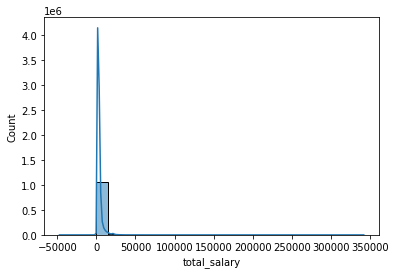

In [18]:
hist_df = df[df.total_salary > 0]
hist_df = hist_df[df.total_salary < 150000]

sns.histplot(df, x='total_salary', bins=25, kde=True)

/Users/tristano/da20/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='total_salary', ylabel='Count'>

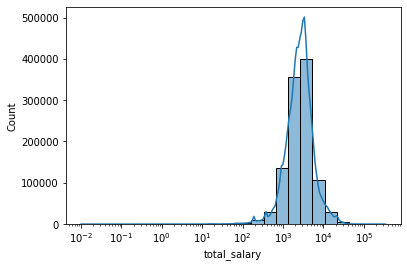

In [19]:

#plotting the x-scale logarithmically to make more sense of the data
sns.histplot(df, x='total_salary', bins=25, kde=True, log_scale=True)


<AxesSubplot:xlabel='Month_salary', ylabel='Count'>

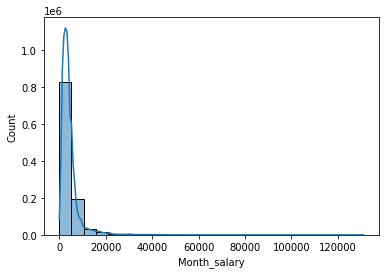

In [20]:

sns.histplot(df, x='Month_salary', bins=25, kde=True)

<AxesSubplot:xlabel='Month_salary', ylabel='Count'>

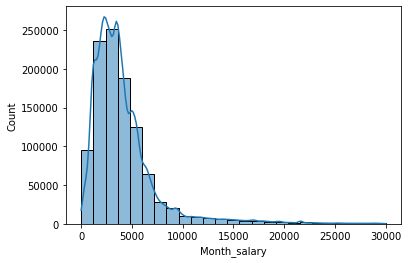

In [21]:
#displaying month salary in more detail for lower salaries
hist_df2 = df[df.Month_salary < 30000]
sns.histplot(hist_df2, x='Month_salary', bins=25, kde=True)

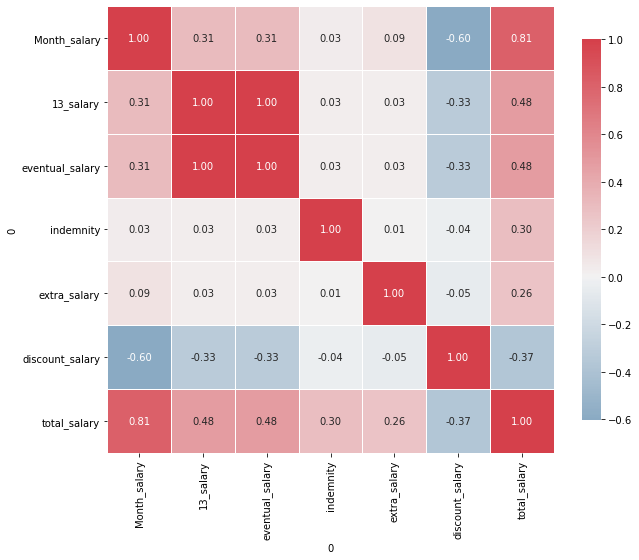

In [22]:
    # Add diverging colormap from red to blue #
cmap = sns.diverging_palette(240, 10, 70, as_cmap=True)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .70}, cmap=cmap)
plt.show();

In [23]:
#taking 20 largest sectors by mean of all salaries within that sector
high_vals = df.groupby(['sector'])['Month_salary'].mean().nlargest(20).values
high_index = df.groupby(['sector'])['Month_salary'].mean().nlargest(20).index

<AxesSubplot:xlabel='Monthly Salary', ylabel='sector'>

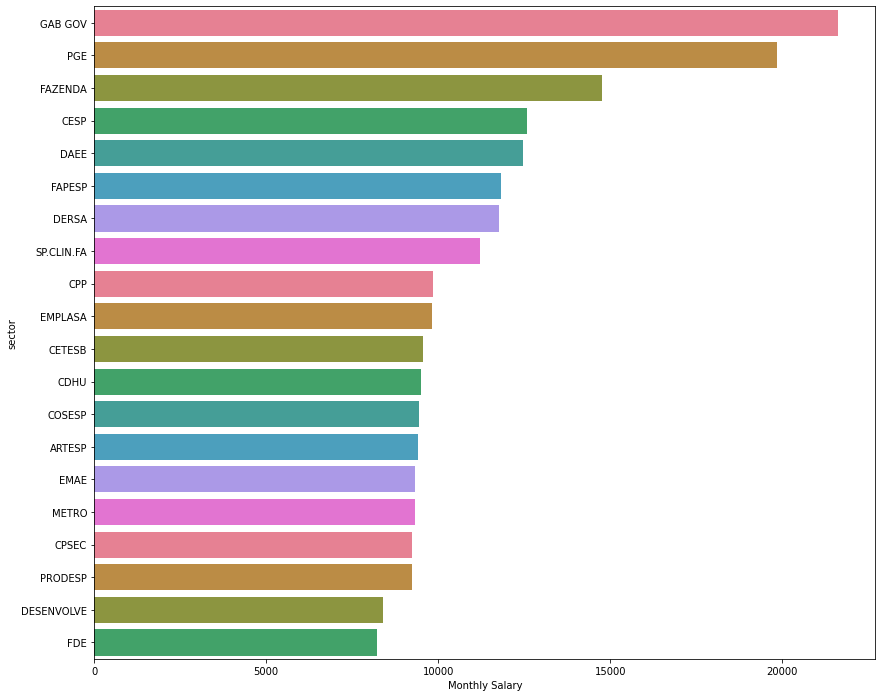

In [24]:
#plotting the top 20 highest-paying sectors by salary
plt.figure(figsize=(14,12))
plt.ylabel("Sector")
plt.xlabel("Monthly Salary")
pall = sns.color_palette("husl", 8)
sns.barplot(y=high_index,x=high_vals,palette=pall)

In [25]:
#taking 20 largest sectors by mean of all salaries within that sector
low_vals = df.groupby(['sector'])['Month_salary'].mean().nsmallest(20).values
low_index = df.groupby(['sector'])['Month_salary'].mean().nsmallest(20).index

<AxesSubplot:xlabel='Monthly Salary', ylabel='sector'>

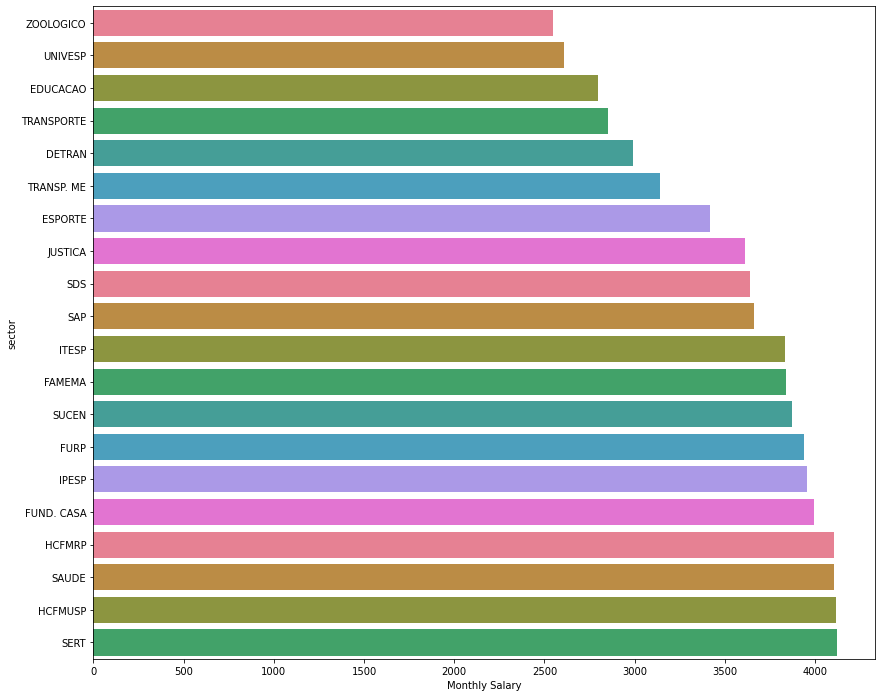

In [26]:
#plotting the top 20 highest-paying sectors by salary
plt.figure(figsize=(14,12))
plt.ylabel("Sector")
plt.xlabel("Monthly Salary")
pall = sns.color_palette("husl", 8)
sns.barplot(y=low_index,x=low_vals,palette=pall)

In [27]:
grouped_df = df.groupby(['sector'])['Month_salary'].mean()

In [28]:
grouped_df

sector
ADM GERAL     5048.529317
AGEM          4976.366111
AGEMCAMP      6620.737143
AGEMVALE      7685.922500
ARSESP        8149.246176
                 ...     
TRANSP. ME    3141.655687
TRANSPORTE    2853.342059
TURISMO       4998.322203
UNIVESP       2609.637441
ZOOLOGICO     2547.909755
Name: Month_salary, Length: 87, dtype: float64

In [29]:
from sklearn.cluster import KMeans 

In [30]:
#evaluating k-means for 1 to 25 clusters
n_centroids = [x+1 for x in range(25)]  #starting from 2 clusters
#WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids
WCSS = []
'''Took about 15 minutes to run'''
for c in n_centroids:
    kmeans = KMeans(n_clusters=c)
    kmeans.fit(df.total_salary.values.reshape(-1, 1))
    WCSS.append(kmeans.inertia_)
    print(c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


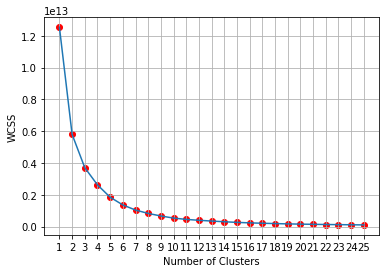

In [31]:
plt.scatter(range(1,26), WCSS, color='r')
plt.plot(range(1,26), WCSS)
plt.xticks(range(1,26))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()

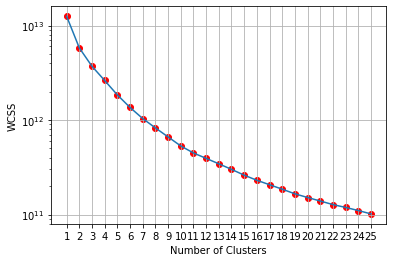

In [32]:
plt.scatter(range(1,26), WCSS, color='r')
plt.plot(range(1,26), WCSS)
plt.xticks(range(1,26))
plt.yscale('log')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()

In [89]:
kmeans = KMeans(n_clusters=9)
advogado = kmeans.fit_predict(df.total_salary.values.reshape(-1, 1))
df['cluster'] = advogado


<ipython-input-89-712026827aaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = advogado


In [108]:
#displaying the clusters which each job belongs to
pd.crosstab(df.job, df.cluster).head()
#Run below to find results for all 3344 jobs
# pd.crosstab(df.job, df.cluster).head()

cluster      0   1     2     3  4   5  6    7  8
job                                             
             0   0     2     2  0   1  0    0  0
1CFO  PM     4   0     4     0  0  56  0    0  0
1SGT  PM  3589  13  1680  9861  1  91  0  130  4
1TEN  PM    29  82  2805   645  1   9  0  787  3
2CFO  PM   100   0     0     0  0  14  0    0  0

In [91]:
pd.set_option('display.max_rows', df.shape[0]+1)
#displaying the clusters which each sector belongs to
sector_clustering = pd.crosstab(df.sector, df.cluster)
sector_clustering

cluster          0     1      2      3   4       5   6      7     8
sector                                                             
ADM GERAL     5052   177   2232   3158   2   21282   0   1173    18
AGEM             3     0      4      6   0       5   0      0     0
AGEMCAMP         1     0      3      9   0       1   0      0     0
AGEMVALE         1     0      3      0   0       0   0      0     0
ARSESP          15     1     48     52   0       8   0     12     0
ARTESP           6     0     22     18   0       2   0      4     0
CASA CIVIL      97     2     26     88   0      12   0      9     1
CBPM            17     0      5      5   0      15   0      1     1
CDHU           128     4    169    165   0      23   0    151     0
CEETEPS       6158    36   2158   4329   1    5972   0    553    17
CESP           133    13     62    114   0     148   0     50     4
CETESB         308    25    576    494   0      69   0    438     3
CIA DOCAS       42     0      6     22   1      33   0      1     0
CODASP         193     0     22     45   0      50   0      2     0
COSESP           5     1     10     20   0       2   0      3     0
CPOS            55     0     56     76   0       8   0     25     0
CPP              0     0      3      7   0       0   0      4     0
CPSEC            0     0      1      6   0       0   0      3     0
CPTM          2512    55    888   2740   0     371   0    344     7
CULTURA         79     0     16     68   0      62   0      6     0
DAEE           427    40    123    277   0     663   0    298    12
DAESP           68     3     10     29   0      52   0     14     0
DER           1049    22     58    144   0    1655   0    184     9
DERSA           76    23     88    148   0      20   0    117     0
DESENVOLVE      38     8     16     57   0      20   0     28     1
DETRAN         982     0     88    441   0    1758   0     21     1
EDUCACAO     83558   214   4082  20930   6  148719   0    867    82
EMAE           124     2     40    118   0     132   0      8     1
EMPLASA         24     0     29     57   0       3   0     39     0
EMTU           180     0     97    107   0     158   0     57     0
ENERGIA         15     1      4      7   0      10   0      1     0
ESPORTE        257     0     12     55   0     152   0      2     0
FAMEMA          86     2     65     67   0     368   0     17     1
FAPESP          31     1     87     95   0       5   0     66     0
FAZENDA       1297   929    353   1093   2     362   0   2005    82
FDE             93     3     90     81   0      40   0     49     1
FMSJRPRETO      93     4     98     89   0     101   0     74     2
FOSP            27     0     10     21   0      24   0      1     0
FUNAP          127     0     17     99   0      89   0      2     0
FUND. CASA    4673     0    204   1214   0    5222   0     23     0
FUND. FLOR     105     0     53    105   0     105   0      8     0
FURP           255     0     75    111   0     404   0      5     0
GAB GOV          0     0      0      0   0       0   0      1     0
HABITACAO       34     0      8     20   0      32   0      1     0
HCFMB          378     5     64    186   0     215   0      8     0
HCFMRP        2200    11    262    610   0    1660   0    127     2
HCFMUSP       3032    64    828   1485   0    4881   0    329     8
IMESC           52     2     30     41   0      81   0     13     0
IMESP          250     0     54    227   0     217   0      2     0
INSTITUTO     2126    74    682    947   0    1035   0    464     7
IPEM           243     0    142    198   0      79   0      5     0
IPESP           10     0      2      9   0      11   0      0     0
IPT            272     0     64    184   0     214   0      1     0
ITESP          211     0     24     98   0     275   0      0     0
JUCESP          68     0     25     96   0      37   0      6     0
JUSTICA         65     0      8     53   0      80   0      1     0
MEIO AMBIE     369     7    171    295   0     450   0  

In [92]:
agg_cluster = df.groupby('cluster')

In [93]:
#displaying the 6 cluster centres as calculated by k-means
agg_cluster.total_salary.mean()

cluster
0      2898.052791
1     20320.142652
2      7713.873899
3      4731.089408
4     65640.530123
5      1337.225002
6    218471.073500
7     12697.108269
8     30879.247853
Name: total_salary, dtype: float64

In [94]:
#considering bonuses over 100 to make the plotting less intensive
bonuscomparison = df[df.extra_salary > 100]

In [95]:
bonuscomparison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265424 entries, 2 to 1085673
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   job              265424 non-null  object 
 1   sector           265424 non-null  object 
 2   Month_salary     265424 non-null  float64
 3   13_salary        265424 non-null  float64
 4   eventual_salary  265424 non-null  float64
 5   indemnity        265424 non-null  float64
 6   extra_salary     265424 non-null  float64
 7   discount_salary  265424 non-null  float64
 8   total_salary     265424 non-null  float64
 9   None             0 non-null       object 
 10  cluster          265424 non-null  int32  
dtypes: float64(7), int32(1), object(3)
memory usage: 23.3+ MB


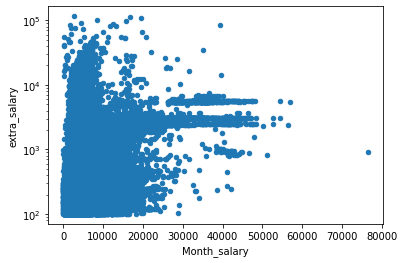

In [52]:
#now instead, we seek to compare the income amount with respect to bonus amount, to see if we can also cluster the data in this way
bonuscomparison.plot.scatter('Month_salary', 'extra_salary')
plt.yscale("log")
plt.show()

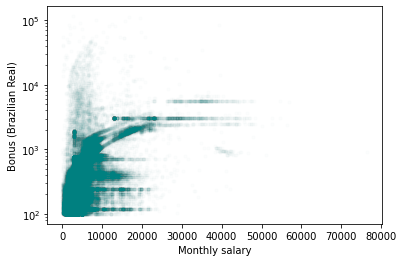

In [102]:
#the above plot is messy and difficult to analyse, so I apply a transparency mask to highlight regions in the graph
#with the most common intersection between monthly salary and bonus
plt.scatter( bonuscomparison['Month_salary'],  bonuscomparison['extra_salary'], s=10,c='teal', alpha = 0.01)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Monthly salary')
plt.ylabel('Bonus (Brazilian Real)')
#plt.scatter(df['Temperature (C)'], df['Humidity'], s=1,c='green')
plt.show() 


In [107]:
#sorting the values so that it's possible to run k-means on 
#month_salary-extra_salary pairs

X = np.array(bonuscomparison['Month_salary'])
Y = np.array(bonuscomparison['extra_salary'])

knndata = []

for i in range(len(X)):
    knndata.append([X[i], Y[i]])
    


### Applying K-means to monthly salary vs. bonus ###

In [80]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(knndata)

In [83]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
bonuscomparison['clusters'] = clustering_kmeans.fit_predict(knndata)

/Users/tristano/da20/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/tristano/da20/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-83-b45289d508a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bonuscomparison['clusters'] = clustering_kmeans.fit_predict(knndata)


In [86]:
# bonuscomparison['clusters']

2          0
3          0
6          0
9          0
10         0
30         0
39         0
54         0
55         0
65         0
66         0
76         0
82         0
89         0
91         0
94         1
100        0
101        1
105        0
108        0
109        0
114        0
118        0
123        0
126        0
128        0
139        0
158        0
160        0
161        0
179        0
181        0
184        0
186        0
190        0
198        0
202        0
206        0
210        0
212        0
215        0
223        0
225        0
236        0
248        0
249        0
250        0
253        0
254        0
258        0
265        0
273        0
285        0
286        0
289        0
297        0
307        0
311        0
313        1
314        0
320        0
325        0
330        0
331        0
345        0
349        0
355        0
362        0
364        0
367        0
383        0
384        0
391        0
398        0
400        0
401        0
410        0

In [87]:
agg_cluster2 = bonuscomparison.groupby('cluster')
#displaying the 6 cluster centres as calculated by k-means
agg_cluster2.extra_salary.mean()

cluster
0      476.182962
1     1958.167807
2      762.504559
3     8037.034452
4      192.912330
5    89478.049000
Name: extra_salary, dtype: float64

In [101]:
agg_cluster2.Month_salary.mean()

cluster
0     4453.607387
1    15717.981541
2     7329.755319
3    19749.995017
4     2073.019831
5    11267.650000
Name: Month_salary, dtype: float64

In [98]:
uniquejobs = df['job'].unique()
len(uniquejobs)


3366

In [106]:
cluster2 = bonuscomparison['cluster']